### We will be predicting the performace of the stock market using 10 years of data to test if classification methods and ensembles built using them are a viable tool to predict the direction of the stock market.

### Import the neccessary libraries that will be used 

In [924]:
import yfinance as yf
from finta import TA
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, accuracy_score

### Import the data using the Yahoo Finance API 

In [925]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

In [927]:
# Local import
# data = pd.read_csv(r'File_Path', index_col=['Date'])
# data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3991400000
2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000
2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000
2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000
2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000
...,...,...,...,...,...,...
2019-12-23,3226.050049,3227.780029,3222.300049,3224.010010,3224.010010,3064530000
2019-12-24,3225.449951,3226.429932,3220.510010,3223.379883,3223.379883,1296530000
2019-12-26,3227.199951,3240.080078,3227.199951,3239.909912,3239.909912,2164540000


In [942]:
#10 years daily
data = yf.download('^GSPC', start = '2010-1-1', end = '2019-12-31', interval='1d')
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3991400000
2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000
2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000
2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000
2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000
...,...,...,...,...,...,...
2019-12-23,3226.050049,3227.780029,3222.300049,3224.010010,3224.010010,3064530000
2019-12-24,3225.449951,3226.429932,3220.510010,3223.379883,3223.379883,1296530000
2019-12-26,3227.199951,3240.080078,3227.199951,3239.909912,3239.909912,2164540000


### EDA on the data

In [943]:
#Inspect the data
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2515 entries, 2010-01-04 to 2019-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2515 non-null   float64
 1   High       2515 non-null   float64
 2   Low        2515 non-null   float64
 3   Close      2515 non-null   float64
 4   Adj Close  2515 non-null   float64
 5   Volume     2515 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 137.5 KB


In [944]:
#Check for any missing data
data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [945]:
#Get some descriptive statistics on the data
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000,2.515000e+03
mean,1961.649681,1970.845432,1951.699524,1962.104611,1962.104611,3.720255e+09
std,588.618150,589.772692,587.203208,588.483867,588.483867,8.129657e+08
min,1027.650024,1032.949951,1010.909973,1022.580017,1022.580017,1.025000e+09
25%,1381.105042,1390.619995,1372.570007,1383.669983,1383.669983,3.245125e+09
50%,1985.319946,1992.689941,1975.650024,1986.449951,1986.449951,3.595430e+09
75%,2433.949951,2441.444946,2427.824951,2433.469971,2433.469971,4.078580e+09
max,3247.229980,3247.929932,3234.370117,3240.020020,3240.020020,1.061781e+10


In [946]:
#Get the current shape of the data
data.shape

(2515, 6)

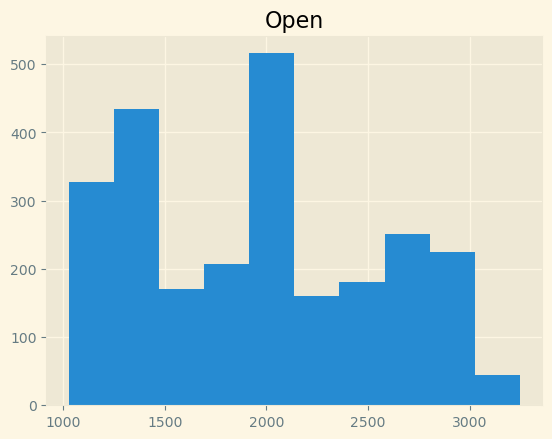

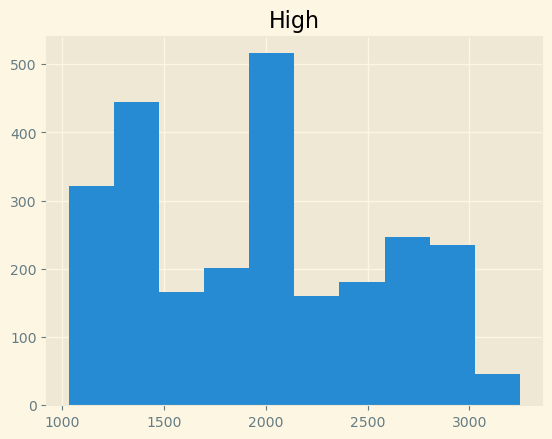

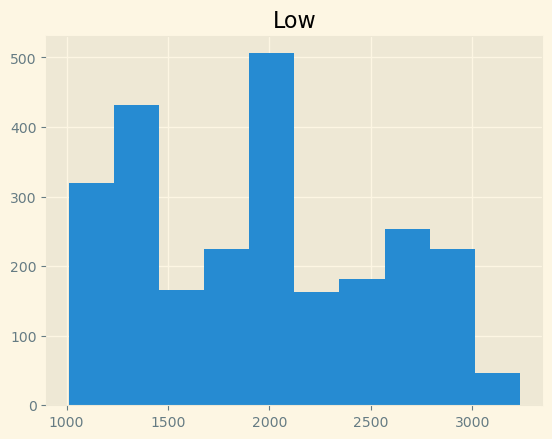

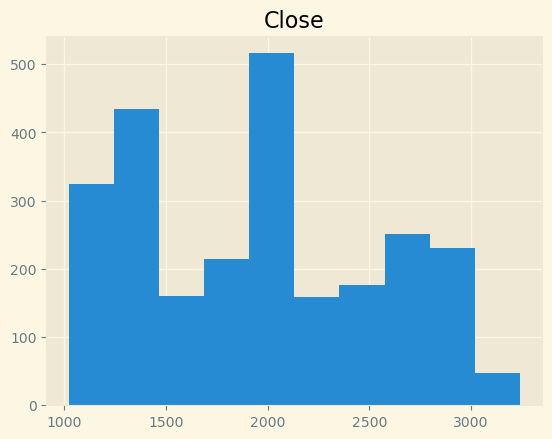

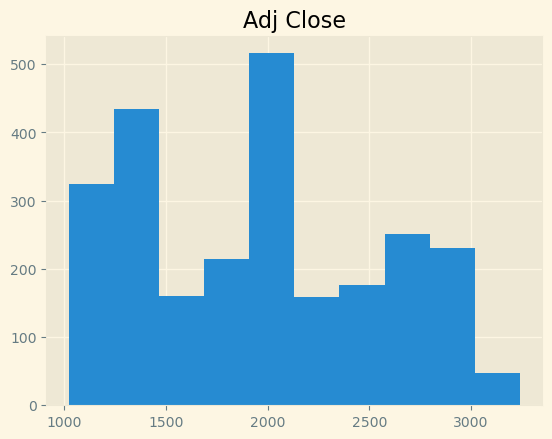

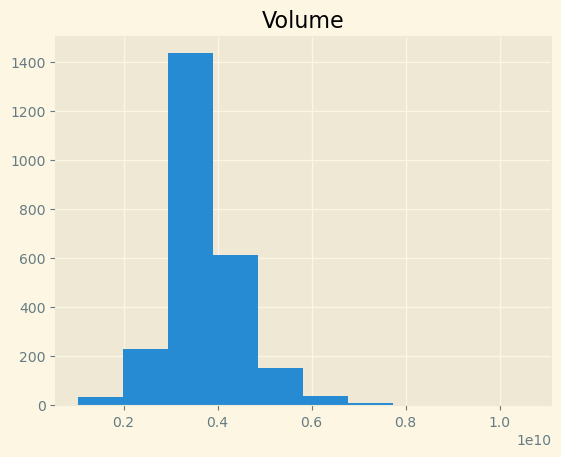

In [947]:
#Get an idea on the distribution of the different columns

# using the style for the plot
plt.style.use('Solarize_Light2')

for column in data.columns:
    plt.hist(data[column])
    plt.title(column)
    plt.show()

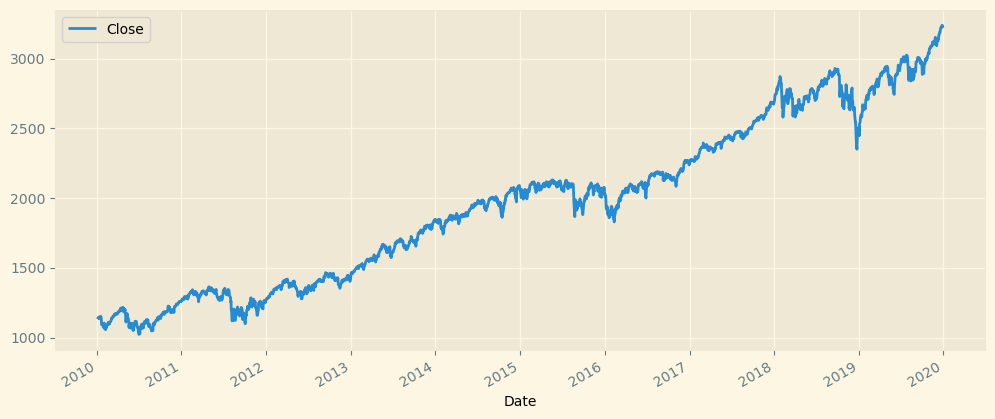

In [948]:
#Visualize the closing price across time
data.plot(y='Close', kind='line', figsize=(12,5))
plt.show()

### Feature Engineering

#### In this step, the columns in our dataset will be used to extract other columns or features that will help us build better machine learning models. We will calculate technical indicators using the 'finta' library and these technical indicators will be our new features that will help us build better classification models. 

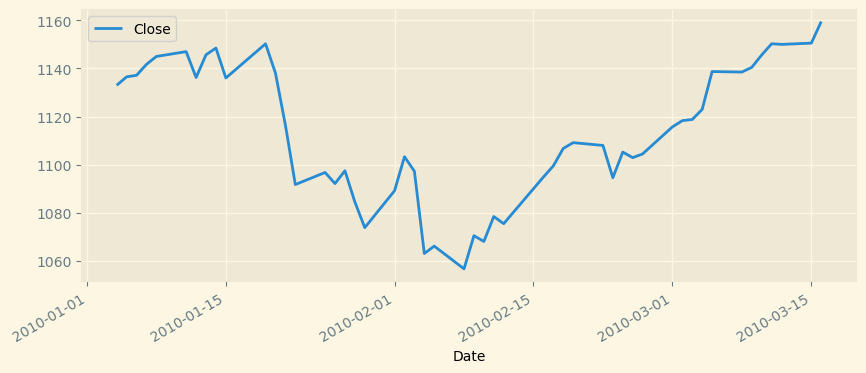

In [949]:
# As we can see, from a sample of our data, our data is rough and has many spikes. This makes it hard for the model to 
# extract trends from the data. Hence, we will want to exponentially smooth the data before we calculate our technical
# indicators.
data[:50].plot(y='Close', figsize=(10,4))
plt.show()

In [950]:
# We implement the smoothing.
# Alpha is the smoothing factor. The smoothing factor has a value between 0 and 1 and represents the weighting applied
# to the most recent period.
data = data.ewm(alpha=0.2).mean()

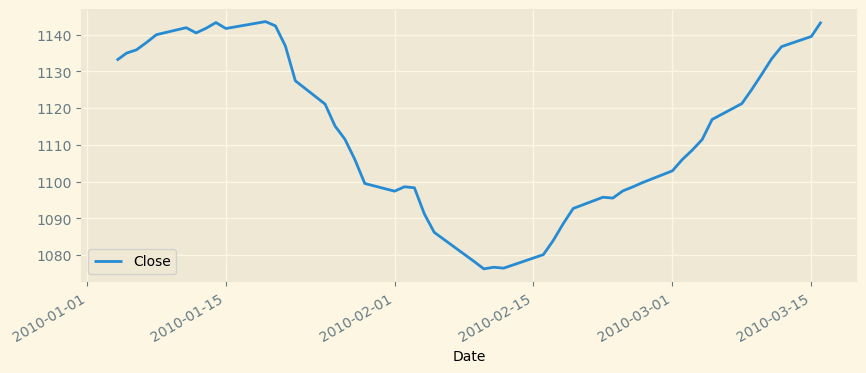

In [951]:
# As we can see now the data has been smoothed. With less peaks and vallys the data can now be more easily fitted into the
# machine learning model
data[:50].plot(y='Close', figsize=(10,4))
plt.show()

In [952]:
# Now, we will compute our technical indicators. We will create a function called get_techniacl_indicators which will do the
# work for us when it comes to calculating the indicators

In [953]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [954]:
# List of symbols for technical indicators that we will calculate

#INDICATORS = ['RSI', 'MACD', 'MSD','STOCH','ADL', 'ATR', 'BASP','MOM', 'MFI', 'ROC', 'OBV', 'CCI', 'EMV', 'VORTEX', 'WMA', 'ER', 'KAMA']
INDICATORS = ['RSI', 'MACD', 'MSD','STOCH','ADL', 'ATR', 'BASP','MOM', 'MFI', 'ROC', 'OBV', 'CCI', 'EMV', 'VORTEX']

#MSD Measure of market volatility. WMA puts more weight on more recent data.

def get_technical_indicators(data):
    """
    Function that uses the finta API to calculate technical indicators used as the features
    
    Args:
        data: The data which has the stock prices with  
        
    Returns:
        data: The dataframe with its technical indicators
    """

    for indicator in INDICATORS:
        ind_data = eval('TA.' + indicator + '(data)')
        if not isinstance(ind_data, pd.DataFrame):
            ind_data = ind_data.to_frame()
        data = data.merge(ind_data, left_index=True, right_index=True)
    data.rename(columns={"14 period EMV.": '14 period EMV'}, inplace=True)

    # Also calculate moving averages for features
    data['ema50'] = data['Close'] / data['Close'].ewm(50).mean()
    data['ema21'] = data['Close'] / data['Close'].ewm(21).mean()
    data['ema15'] = data['Close'] / data['Close'].ewm(14).mean()
    data['ema5'] = data['Close'] / data['Close'].ewm(5).mean()

    # Instead of using the actual volume value (which changes over time), we normalize it with a moving volume average
    data['normVol'] = data['Volume'] / data['Volume'].ewm(5).mean()

    # Remove columns that won't be used as features
    data.drop(columns=['Open', 'High', 'Low', 'Volume', 'Adj Close'], inplace=True)
    
    return data

data = get_technical_indicators(data)
print(data.columns)

Index(['Close', '14 period RSI', 'MACD', 'SIGNAL', 'MSD', '14 period STOCH %K',
       'MFV', '14 period ATR', 'Buy.', 'Sell.', 'MOM', '14 period MFI', 'ROC',
       'OBV', '20 period CCI', '14 period EMV', 'VIm', 'VIp', 'ema50', 'ema21',
       'ema15', 'ema5', 'normVol'],
      dtype='object')


### Computing Truth Values 

##### We compute truth values by comparing the closing price of one day with the closing price of the next day and see if there was an increase or a decrease in value. This serves as a look-ahead and lets us know if the data for that day led to an increase or decrease the next day. If it led to an increase then the target variable would be '1' and if there was a decrease the target variable would be '0' .

In [955]:
def produce_truth_value(data, window):
    """
    At a given row, it looks 'window' rows ahead to see if the price increased (1) or decreased (0)
    
    Args:
        data: The dataframe
        window: number of days, or rows to look ahead to see what the price did
        
    Returns:
        Data with target variable (truth values)
    """
    
    prediction = (data.shift(-window)['Close'] >= data['Close'])
    prediction = prediction.iloc[:-window]
    data['truth'] = prediction.astype(int)
    
    return data

data = produce_truth_value(data, window=1) #We pass to the function window=1 as we want to look ahead one day only
data.drop(columns=['Close'], inplace=True)
data = data.dropna() # Some indicators produce NaN values for the first few rows, we just remove them here
data.tail()

,14 period RSI,MACD,SIGNAL,MSD,14 period STOCH %K,MFV,14 period ATR,Buy.,Sell.,MOM,...,20 period CCI,14 period EMV,VIm,VIp,ema50,ema21,ema15,ema5,normVol,truth
Date,,,,,,,,,,,,,,,,,,,,,
2019-12-20,93.613000,27.611146,25.726293,22.952107,93.237308,1.180329e+12,17.564493,0.890412,0.914603,61.161252,...,182.436000,0.018764,0.768690,1.238124,1.051767,1.029123,1.021354,1.009910,1.158094,1.0
2019-12-23,94.249532,28.868053,26.354645,25.267395,94.215838,1.180840e+12,17.144049,0.715306,0.810178,66.539012,...,173.051921,0.024054,0.694003,1.316061,1.053280,1.030218,1.022284,1.010346,1.075045,1.0
2019-12-24,94.695955,30.023106,27.088337,27.412853,95.022696,1.181223e+12,16.601552,0.558995,0.652205,71.403182,...,160.302499,0.025930,0.652167,1.359715,1.054201,1.030728,1.022633,1.010252,0.939933,1.0
2019-12-26,95.226074,31.249069,27.920483,29.867733,96.047715,1.182214e+12,16.181986,0.642720,0.499726,76.778551,...,151.614743,0.028017,0.601658,1.397841,1.055762,1.031840,1.023565,1.010708,0.887599,1.0
2019-12-27,95.605708,32.385742,28.813535,32.414419,95.366830,1.182820e+12,15.758194,0.595508,0.585153,75.712831,...,144.215340,0.027935,0.581382,1.414122,1.056758,1.032392,1.023941,1.010654,0.865954,1.0


In [956]:
#We make sure we do not have any missing values
data.isna().any()

14 period RSI         False
MACD                  False
SIGNAL                False
MSD                   False
14 period STOCH %K    False
MFV                   False
14 period ATR         False
Buy.                  False
Sell.                 False
MOM                   False
14 period MFI         False
ROC                   False
OBV                   False
20 period CCI         False
14 period EMV         False
VIm                   False
VIp                   False
ema50                 False
ema21                 False
ema15                 False
ema5                  False
normVol               False
truth                 False
dtype: bool

### Building the Model 

In [957]:
# Training a Random Forest model

def train_random_forest(X_train, y_train):

    """
    Function that uses random forest classifier to train the model
    :return:
    """
    
    # Create a new random forest classifier
    rf = RandomForestClassifier()
    
    # Dictionary of all values we want to test for n_estimators
    params_rf = {'n_estimators': [50,80,100,120,140,150,160,180,200,220,250,300,350]}
    
    # Use gridsearch to test all values for n_estimators
    rf_gs = GridSearchCV(rf, params_rf, cv=5)
    
    # Fit model to training data
    rf_gs.fit(X_train, y_train)
    
    # Save best model
    rf_best = rf_gs.best_estimator_
    
    return rf_best

In [958]:
#Then we train the kNN model

def train_KNN(X_train, y_train):

    knn = KNeighborsClassifier()
    # Create a dictionary of all values we want to test for n_neighbors
    params_knn = {'n_neighbors': np.arange(1, 35)}
    
    # Use gridsearch to test all values for n_neighbors
    knn_gs = GridSearchCV(knn, params_knn, cv=5)
    
    # Fit model to training data
    knn_gs.fit(X_train, y_train)
    
    # Save best model
    knn_best = knn_gs.best_estimator_

    return knn_best

In [959]:
# Then we train an SVM model
def train_svm(X_train, y_train):
    #Create a svm Classifier
    svm = SVC()
    
    # Defining parameter range
    params_svm = {'gamma': [1, 0.5, 0.1, 0.01, 0.001, 0.0001],
                 'C': [0.1, 1, 5, 10, 100]}
    
    # Use gridsearch to test values for C, and gamma
    svm_gs = GridSearchCV(svm, params_svm, cv=5)

    #Train the model using the training sets
    svm_gs.fit(X_train, y_train)

    #Save best model
    svm_best = svm_gs.best_estimator_
    
    return svm_best

In [960]:
# Then we train a Naive Bayes model
def train_NaiveBayes(X_train, y_train):
    
    #Instantiate the model using default parameters
    naiveBayes = GaussianNB()
    
    # Train model
    naive_best  = naiveBayes.fit(X_train, y_train)
    
    return naive_best


In [961]:
# Then we train a Logistic Regression model
def train_logreg(X_train, y_train):
    
    # instantiate the model (using the default parameters)
    logreg = LogisticRegression()

    # fit the model with data
    logreg_best = logreg.fit(X_train,y_train)
    
    return logreg_best

In [962]:
# Training of Ensembles of 2 models

def train_ensemble_rf_knn(rf_model, knn_model, rf_accuracy, knn_accuracy, X_train, y_train):
    
    # Create a dictionary of our models
    estimators=[('knn', knn_model), ('rf', rf_model)]
    
    # Assing weights based on the accuracies of the individual models
    
    scores = [rf_accuracy, knn_accuracy]
    
    # Create our voting classifier, inputting our models
    ensemble = VotingClassifier(estimators, voting='hard', weights = scores)
    
    #fit model to training data
    ensemble.fit(X_train, y_train)
    
    return ensemble



def train_ensemble_rf_svm(rf_model, svm_model, rf_accuracy, svm_accuracy, X_train, y_train):

    # Create a dictionary of our models
    estimators = [('svm', svm_model), ('rf', rf_model)]

    # Assign weights based on the accuracies of the individual models
    scores = [rf_accuracy, svm_accuracy]

    # Create our voting classifier, inputting our models
    ensemble = VotingClassifier(estimators, voting='hard', weights=scores)

    # Fit model to training data
    ensemble.fit(X_train, y_train)

    return ensemble


def train_ensemble_rf_nb(rf_model, naiveBayes_model, rf_accuracy, naiveBayes_accuracy, X_train, y_train):

    # Create a dictionary of our models
    estimators = [('nb', naiveBayes_model), ('rf', rf_model)]

    # Assign weights based on the accuracies of the individual models
    scores = [rf_accuracy, naiveBayes_accuracy]

    # Create our voting classifier, inputting our models
    ensemble = VotingClassifier(estimators, voting='hard', weights=scores)

    # Fit model to training data
    ensemble.fit(X_train, y_train)

    return ensemble


def train_ensemble_rf_lr(rf_model, logreg_model, rf_accuracy, logreg_accuracy, X_train, y_train):

    # Create a dictionary of our models
    estimators = [('lr', logreg_model), ('rf', rf_model)]

    # Assign weights based on the accuracies of the individual models
    scores = [rf_accuracy, logreg_accuracy]

    # Create our voting classifier, inputting our models
    ensemble = VotingClassifier(estimators, voting='hard', weights=scores)

    # Fit model to training data
    ensemble.fit(X_train, y_train)

    return ensemble


def train_ensemble_knn_svm(knn_model, svm_model, knn_accuracy, svm_accuracy, X_train, y_train):

    # Create a dictionary of our models
    estimators = [('svm', svm_model), ('knn', knn_model)]

    # Assign weights based on the accuracies of the individual models
    scores = [knn_accuracy, svm_accuracy]

    # Create our voting classifier, inputting our models
    ensemble = VotingClassifier(estimators, voting='hard', weights=scores)

    # Fit model to training data
    ensemble.fit(X_train, y_train)

    return ensemble


def train_ensemble_knn_nb(knn_model, naiveBayes_model, knn_accuracy, naiveBayes_accuracy, X_train, y_train):

    # Create a dictionary of our models
    estimators = [('nb', naiveBayes_model), ('knn', knn_model)]

    # Assign weights based on the accuracies of the individual models
    scores = [knn_accuracy, naiveBayes_accuracy]

    # Create our voting classifier, inputting our models
    ensemble = VotingClassifier(estimators, voting='hard', weights=scores)

    # Fit model to training data
    ensemble.fit(X_train, y_train)

    return ensemble


def train_ensemble_knn_lr(knn_model, logreg_model, knn_accuracy, logreg_accuracy, X_train, y_train):

    # Create a dictionary of our models
    estimators = [('nb', logreg_model), ('knn', knn_model)]

    # Assign weights based on the accuracies of the individual models
    scores = [knn_accuracy, logreg_accuracy]

    # Create our voting classifier, inputting our models
    ensemble = VotingClassifier(estimators, voting='hard', weights=scores)

    # Fit model to training data
    ensemble.fit(X_train, y_train)

    return ensemble


def train_ensemble_svm_nb(svm_model, naiveBayes_model, svm_accuracy, naiveBayes_accuracy, X_train, y_train):

    # Create a dictionary of our models
    estimators = [('nb', naiveBayes_model), ('svm', svm_model)]

    # Assign weights based on the accuracies of the individual models
    scores = [svm_accuracy, naiveBayes_accuracy]

    # Create our voting classifier, inputting our models
    ensemble = VotingClassifier(estimators, voting='hard', weights=scores)

    # Fit model to training data
    ensemble.fit(X_train, y_train)

    return ensemble


def train_ensemble_svm_lr(svm_model, logreg_model, svm_accuracy, logreg_accuracy, X_train, y_train):

    # Create a dictionary of our models
    estimators = [('lr', logreg_model), ('svm', svm_model)]

    # Assign weights based on the accuracies of the individual models
    scores = [svm_accuracy, logreg_accuracy]

    # Create our voting classifier, inputting our models
    ensemble = VotingClassifier(estimators, voting='hard', weights=scores)

    # Fit model to training data
    ensemble.fit(X_train, y_train)

    return ensemble


def train_ensemble_nb_lr(naiveBayes_model, logreg_model, naiveBayes_accuracy, logreg_accuracy, X_train, y_train):

    # Create a dictionary of our models
    estimators = [('lr', logreg_model), ('nb', naiveBayes_model)]

    # Assign weights based on the accuracies of the individual models
    scores = [naiveBayes_accuracy, logreg_accuracy]

    # Create our voting classifier, inputting our models
    ensemble = VotingClassifier(estimators, voting='hard', weights=scores)

    # Fit model to training data
    ensemble.fit(X_train, y_train)

    return ensemble



In [963]:
# Training of ensembles of 3 models

def train_ensemble_rf_knn_svm(rf_model, knn_model, svm_model, rf_accuracy, knn_accuracy, svm_accuracy, X_train, y_train):
    
    # Create a dictionary of our models
    estimators=[('knn', knn_model), ('rf', rf_model), ('svm', svm_model)]
    
    # Assign weights based on accuracies of individual models
    scores = [knn_accuracy, rf_accuracy, svm_accuracy]
    
    # Create our voting classifier, inputting our models
    ensemble = VotingClassifier(estimators, voting='hard', weights=scores)
    
    #fit model to training data
    ensemble.fit(X_train, y_train)
    
    return ensemble


def train_ensemble_rf_nb_knn(rf_model, nb_model, knn_model, rf_accuracy, nb_accuracy, knn_accuracy, X_train, y_train):
    
    # Create a dictionary of our models
    estimators=[('knn', knn_model), ('rf', rf_model), ('nb', nb_model)]
    
    # Assign weights based on accuracies of individual models
    scores = [knn_accuracy, rf_accuracy, nb_accuracy]
    
    # Create our voting classifier, inputting our models
    ensemble = VotingClassifier(estimators, voting='hard', weights=scores)
    
    #fit model to training data
    ensemble.fit(X_train, y_train)
    
    return ensemble

def train_ensemble_rf_knn_lr(rf_model, knn_model, lr_model, rf_accuracy, knn_accuracy, lr_accuracy, X_train, y_train):
    
    # Create a dictionary of our models
    estimators=[('knn', knn_model), ('rf', rf_model), ('lr', lr_model)]
    
    # Assign weights based on accuracies of individual models
    scores = [knn_accuracy, rf_accuracy, lr_accuracy]
    
    # Create our voting classifier, inputting our models
    ensemble = VotingClassifier(estimators, voting='hard', weights=scores)
    
    #fit model to training data
    ensemble.fit(X_train, y_train)
    
    return ensemble

def train_ensemble_rf_svm_nb(rf_model, svm_model, nb_model, rf_accuracy, svm_accuracy, nb_accuracy, X_train, y_train):
    
    # Create a dictionary of our models
    estimators=[('svm', svm_model), ('rf', rf_model), ('nb', nb_model)]
    
    # Assign weights based on accuracies of individual models
    scores = [svm_accuracy, rf_accuracy, nb_accuracy]
    
    # Create our voting classifier, inputting our models
    ensemble = VotingClassifier(estimators, voting='hard', weights=scores)
    
    #fit model to training data
    ensemble.fit(X_train, y_train)
    
    return ensemble

def train_ensemble_rf_svm_lr(rf_model, svm_model, lr_model, rf_accuracy, svm_accuracy, lr_accuracy, X_train, y_train):
    
    # Create a dictionary of our models
    estimators=[('svm', svm_model), ('rf', rf_model), ('lr', lr_model)]
    
    # Assign weights based on accuracies of individual models
    scores = [svm_accuracy, rf_accuracy, lr_accuracy]
    
    # Create our voting classifier, inputting our models
    ensemble = VotingClassifier(estimators, voting='hard', weights=scores)
    
    #fit model to training data
    ensemble.fit(X_train, y_train)
    
    return ensemble


def train_ensemble_rf_nb_lr(rf_model, nb_model, lr_model, rf_accuracy, nb_accuracy, lr_accuracy, X_train, y_train):
    
    # Create a dictionary of our models
    estimators=[('nb', nb_model), ('rf', rf_model), ('lr', lr_model)]
    
    # Assign weights based on accuracies of individual models
    scores = [nb_accuracy, rf_accuracy, lr_accuracy]
    
    # Create our voting classifier, inputting our models
    ensemble = VotingClassifier(estimators, voting='hard', weights=scores)
    
    #fit model to training data
    ensemble.fit(X_train, y_train)
    
    return ensemble

def train_ensemble_knn_svm_nb(knn_model, svm_model, nb_model, knn_accuracy, svm_accuracy, nb_accuracy, X_train, y_train):
    
    # Create a dictionary of our models
    estimators=[('svm', svm_model), ('knn', knn_model), ('nb', nb_model)]
    
    # Assign weights based on accuracies of individual models
    scores = [svm_accuracy, knn_accuracy, nb_accuracy]
    
    # Create our voting classifier, inputting our models
    ensemble = VotingClassifier(estimators, voting='hard', weights=scores)
    
    #fit model to training data
    ensemble.fit(X_train, y_train)
    
    return ensemble

def train_ensemble_knn_svm_lr(knn_model, svm_model, lr_model, knn_accuracy, svm_accuracy, lr_accuracy, X_train, y_train):
    
    # Create a dictionary of our models
    estimators=[('svm', svm_model), ('knn', knn_model), ('lr', lr_model)]
    
    # Assign weights based on accuracies of individual models
    scores = [svm_accuracy, knn_accuracy, lr_accuracy]
    
    # Create our voting classifier, inputting our models
    ensemble = VotingClassifier(estimators, voting='hard', weights=scores)
    
    #fit model to training data
    ensemble.fit(X_train, y_train)
    
    return ensemble

def train_ensemble_knn_nb_lr(knn_model, nb_model, lr_model, knn_accuracy, nb_accuracy, lr_accuracy, X_train, y_train):
    
    # Create a dictionary of our models
    estimators=[('knn', knn_model), ('nb', nb_model), ('lr', lr_model)]
    
    # Assign weights based on accuracies of individual models
    scores = [knn_accuracy, nb_accuracy, lr_accuracy]
    
    # Create our voting classifier, inputting our models
    ensemble = VotingClassifier(estimators, voting='hard', weights=scores)
    
    #fit model to training data
    ensemble.fit(X_train, y_train)
    
    return ensemble


def train_ensemble_svm_nb_lr(svm_model, nb_model, lr_model, svm_accuracy, nb_accuracy, lr_accuracy, X_train, y_train):
    
    # Create a dictionary of our models
    estimators=[('svm', svm_model), ('nb', nb_model), ('lr', lr_model)]
    
    # Assign weights based on accuracies of individual models
    scores = [svm_accuracy, nb_accuracy, lr_accuracy]
    
    # Create our voting classifier, inputting our models
    ensemble = VotingClassifier(estimators, voting='hard', weights=scores)
    
    #fit model to training data
    ensemble.fit(X_train, y_train)
    
    return ensemble

In [964]:
# Training of Ensembles of 4 models

def train_ensemble_rf_knn_svm_nb(rf_model, knn_model, svm_model, nb_model, rf_accuracy, knn_accuracy, svm_accuracy, nb_accuracy, X_train, y_train):
    
    # Create a dictionary of our models
    estimators=[('knn', knn_model), ('rf', rf_model), ('svm', svm_model), ('nb', nb_model)]
    
    # Assign weights based on accuracies of individual models
    scores = [knn_accuracy, rf_accuracy, svm_accuracy, nb_accuracy]
    
    # Create our voting classifier, inputting our models
    ensemble = VotingClassifier(estimators, voting='hard', weights=scores)
    
    #fit model to training data
    ensemble.fit(X_train, y_train)
    
    return ensemble

def train_ensemble_rf_knn_svm_lr(rf_model, knn_model, svm_model, lr_model, rf_accuracy, knn_accuracy, svm_accuracy, lr_accuracy, X_train, y_train):
    
    # Create a dictionary of our models
    estimators=[('knn', knn_model), ('rf', rf_model), ('svm', svm_model), ('lr', lr_model)]
    
    # Assign weights based on accuracies of individual models
    scores = [knn_accuracy, rf_accuracy, svm_accuracy, lr_accuracy]
    
    # Create our voting classifier, inputting our models
    ensemble = VotingClassifier(estimators, voting='hard', weights=scores)
    
    #fit model to training data
    ensemble.fit(X_train, y_train)
    
    return ensemble



def train_ensemble_rf_knn_nb_lr(rf_model, knn_model, nb_model, lr_model, rf_accuracy, knn_accuracy, nb_accuracy, lr_accuracy, X_train, y_train):
    
    # Create a dictionary of our models
    estimators=[('knn', knn_model), ('rf', rf_model), ('nb', nb_model), ('lr', lr_model)]
    
    # Assign weights based on accuracies of individual models
    scores = [knn_accuracy, rf_accuracy, nb_accuracy, lr_accuracy]
    
    # Create our voting classifier, inputting our models
    ensemble = VotingClassifier(estimators, voting='hard', weights=scores)
    
    #fit model to training data
    ensemble.fit(X_train, y_train)
    
    return ensemble

def train_ensemble_rf_svm_nb_lr(rf_model, nb_model, svm_model, lr_model, rf_accuracy, nb_accuracy, svm_accuracy, lr_accuracy, X_train, y_train):
    
    # Create a dictionary of our models
    estimators=[('rf', rf_model), ('svm', svm_model), ('nb', nb_model), ('lr', lr_model)]
    
    # Assign weights based on accuracies of individual models
    scores = [rf_accuracy, svm_accuracy, nb_accuracy, lr_accuracy]
    
    # Create our voting classifier, inputting our models
    ensemble = VotingClassifier(estimators, voting='hard', weights=scores)
    
    #fit model to training data
    ensemble.fit(X_train, y_train)
    
    return ensemble



def train_ensemble_knn_svm_nb_lr(knn_model, svm_model, nb_model, lr_model, knn_accuracy, svm_accuracy, nb_accuracy, lr_accuracy, X_train, y_train):
    
    # Create a dictionary of our models
    estimators=[('knn', knn_model), ('svm', svm_model), ('nb', nb_model), ('lr', lr_model)]
    
    # Assign weights based on accuracies of individual models
    scores = [knn_accuracy,svm_accuracy, nb_accuracy, lr_accuracy]
    
    # Create our voting classifier, inputting our models
    ensemble = VotingClassifier(estimators, voting='hard', weights=scores)
    
    #fit model to training data
    ensemble.fit(X_train, y_train)
    
    return ensemble

In [965]:
# Training of Ensemble using all 5 models

def train_ensemble_rf_knn_svm_nb_lr(rf_model, knn_model, svm_model, nb_model, lr_model,rf_accuracy, knn_accuracy, svm_accuracy, nb_accuracy, lr_accuracy,X_train, y_train):
    
    # Create a dictionary of our models
    estimators=[('knn', knn_model), ('rf', rf_model), ('svm', svm_model), ('nb', nb_model), ('lr', lr_model)]
    
    # Assign weights based on accuracies of individual models
    scores = [knn_accuracy, rf_accuracy, svm_accuracy, nb_accuracy, lr_accuracy]
    
    # Create our voting classifier, inputting our models
    ensemble = VotingClassifier(estimators, voting='hard', weights=scores)
    
    #fit model to training data
    ensemble.fit(X_train, y_train)
    
    return ensemble

### Cross Validation 

In [966]:
# Play around with both cross validation methods.
# It is preferred you use the first one as this is different than the one used in the example

In [967]:
def cross_Validation(data, folds = 10):

    # Split data into equal partitions of size len_train
    
    len_train = len(data)//folds # Length of each train-test set
    
    print('We have a total of', len(data), 'data points in the data. We will divide them into', folds, '.\n')
    
    print('Hence, length of each train-test set will be: ', len_train, 'data points \n')
    
    # Lists to store the results from each model
    
    # Lists for Individual models
    rf_RESULTS = []
    knn_RESULTS = []
    svm_RESULTS = []
    NB_RESULTS = []
    lr_RESULTS =[]
    
    # Lists for models of Ensembles of 2 models
    ensemble_rf_knn_RESULTS = []
    ensemble_rf_svm_RESULTS = []
    ensemble_rf_nb_RESULTS = []
    ensemble_rf_lr_RESULTS = []
    ensemble_knn_svm_RESULTS = []
    ensemble_knn_nb_RESULTS = []
    ensemble_knn_lr_RESULTS = []
    ensemble_svm_nb_RESULTS = []
    ensemble_svm_lr_RESULTS = []
    ensemble_nb_lr_RESULTS = []
    
    #Lists for models of Enembles of 3 models
    ensemble_rf_knn_svm_RESULTS = []
    ensemble_rf_nb_knn_RESULTS = []
    ensemble_rf_knn_lr_RESULTS = []
    ensemble_rf_svm_nb_RESULTS = []
    ensemble_rf_svm_lr_RESULTS = []
    ensemble_rf_nb_lr_RESULTS = []
    ensemble_knn_svm_nb_RESULTS = []
    ensemble_knn_svm_lr_RESULTS = []
    ensemble_knn_nb_lr_RESULTS = []
    ensemble_svm_nb_lr_RESULTS = []
    
    #Lists for models of Ensembles of 4 models
    ensemble_rf_knn_svm_nb_RESULTS = []
    ensemble_rf_knn_svm_lr_RESULTS = []
    ensemble_rf_knn_nb_lr_RESULTS = []
    ensemble_rf_svm_nb_lr_RESULTS = []
    ensemble_knn_svm_nb_lr_RESULTS = []
    
    #List for Ensemble using all 5 models
    ensemble_rf_knn_svm_nb_lr_RESULTS = []
    
    print('---------------------------------------Intermediate Results---------------------------------------')
    
    i = 0
    while (i<folds):
        
        # Partition the data into chunks of size len_train for ever fold
        df = data.iloc[i * len_train : (i * len_train) + len_train]
        print('\nFold', str(i+1), ':',i * len_train, '-->' ,(i * len_train) + len_train)
        i += 1

        # Creating the Training and Test Splits
        y = df['truth']
        features = [x for x in df.columns if x not in ['truth']]
        X = df[features]

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.10 ,shuffle=False)
        
        #Training, Predict, and Test Accuracy on Indivdual Models
        
        rf_model = train_random_forest(X_train, y_train)
        knn_model = train_KNN(X_train, y_train)
        svm_model = train_svm(X_train, y_train)
        nb_model = train_NaiveBayes(X_train, y_train)
        lr_model = train_logreg(X_train, y_train)
        
        rf_prediction = rf_model.predict(X_test)
        knn_prediction = knn_model.predict(X_test)
        svm_prediction = svm_model.predict(X_test)
        nb_prediction = nb_model.predict(X_test)
        lr_prediction = lr_model.predict(X_test)
        
        
        # We will use these accuracies of Individual models to build a Weighted Average Ensemble
        
        rf_accuracy = accuracy_score(y_test.values, rf_prediction)
        knn_accuracy = accuracy_score(y_test.values, knn_prediction)
        svm_accuracy = accuracy_score(y_test.values, svm_prediction)
        nb_accuracy = accuracy_score(y_test.values, nb_prediction)
        lr_accuracy = accuracy_score(y_test.values, lr_prediction)
        
        
        # Train weighted 2-model Ensembles with the weights from the accuracies of individual models
        
        
        ensemble_rf_knn_model = train_ensemble_rf_knn(rf_model, knn_model, rf_accuracy, knn_accuracy, X_train, y_train)
        ensemble_rf_svm_model = train_ensemble_rf_svm(rf_model, svm_model, rf_accuracy, svm_accuracy, X_train, y_train)
        ensemble_rf_nb_model = train_ensemble_rf_nb(rf_model, nb_model, rf_accuracy, nb_accuracy, X_train, y_train)
        ensemble_rf_lr_model = train_ensemble_rf_lr(rf_model, lr_model, rf_accuracy, lr_accuracy, X_train, y_train)
        ensemble_knn_svm_model = train_ensemble_knn_svm(knn_model, svm_model, knn_accuracy, svm_accuracy, X_train, y_train)
        ensemble_knn_nb_model = train_ensemble_knn_nb(knn_model, nb_model, knn_accuracy, nb_accuracy, X_train, y_train)
        ensemble_knn_lr_model = train_ensemble_knn_lr(knn_model, lr_model, knn_accuracy, lr_accuracy, X_train, y_train)
        ensemble_svm_nb_model = train_ensemble_svm_nb(svm_model, nb_model, svm_accuracy, nb_accuracy, X_train, y_train)
        ensemble_svm_lr_model = train_ensemble_svm_lr(svm_model, lr_model, svm_accuracy, lr_accuracy, X_train, y_train)
        ensemble_nb_lr_model = train_ensemble_nb_lr(nb_model, lr_model, nb_accuracy, lr_accuracy, X_train, y_train)

        # Train weighted 3-model Ensembles with the weights from the accuracies of individual models
        ensemble_rf_knn_svm_model = train_ensemble_rf_knn_svm(rf_model, knn_model, svm_model,rf_accuracy, knn_accuracy, svm_accuracy,X_train, y_train)
        ensemble_rf_nb_knn_model = train_ensemble_rf_nb_knn(rf_model, nb_model, knn_model,rf_accuracy,nb_accuracy, knn_accuracy,X_train, y_train)
        ensemble_rf_knn_lr_model = train_ensemble_rf_knn_lr(rf_model, knn_model, lr_model, rf_accuracy, knn_accuracy, lr_accuracy, X_train, y_train)
        ensemble_rf_svm_nb_model = train_ensemble_rf_svm_nb(rf_model, svm_model, nb_model, rf_accuracy, svm_accuracy, nb_accuracy, X_train, y_train)
        ensemble_rf_svm_lr_model = train_ensemble_rf_svm_lr(rf_model, svm_model, lr_model, rf_accuracy, svm_accuracy, lr_accuracy, X_train, y_train)
        ensemble_rf_nb_lr_model = train_ensemble_rf_nb_lr(rf_model, nb_model, lr_model, rf_accuracy, nb_accuracy, lr_accuracy, X_train, y_train)
        ensemble_knn_svm_nb_model = train_ensemble_knn_svm_nb(knn_model, svm_model, nb_model, knn_accuracy, svm_accuracy, nb_accuracy, X_train, y_train)
        ensemble_knn_svm_lr_model = train_ensemble_knn_svm_lr(knn_model, svm_model, lr_model, knn_accuracy, svm_accuracy, lr_accuracy, X_train, y_train)
        ensemble_knn_nb_lr_model = train_ensemble_knn_nb_lr(knn_model, nb_model, lr_model, knn_accuracy, nb_accuracy, lr_accuracy, X_train, y_train)
        ensemble_svm_nb_lr_model = train_ensemble_svm_nb_lr(svm_model, nb_model, lr_model, svm_accuracy, nb_accuracy, lr_accuracy, X_train, y_train)
        
         # Train weighted 4-model Ensembles with the weights from the accuracies of individual models
            
        ensemble_rf_knn_svm_nb_model = train_ensemble_rf_knn_svm_nb(rf_model, knn_model, svm_model, nb_model, rf_accuracy, knn_accuracy, svm_accuracy, nb_accuracy, X_train, y_train)
        ensemble_rf_knn_svm_lr_model = train_ensemble_rf_knn_svm_lr(rf_model, knn_model, svm_model, lr_model, rf_accuracy, knn_accuracy, svm_accuracy, lr_accuracy, X_train, y_train)
        ensemble_rf_knn_nb_lr_model = train_ensemble_rf_knn_nb_lr(rf_model, knn_model, nb_model, lr_model, rf_accuracy, knn_accuracy, nb_accuracy, lr_accuracy, X_train, y_train)
        ensemble_rf_svm_nb_lr_model = train_ensemble_rf_svm_nb_lr(rf_model, nb_model, svm_model, lr_model, rf_accuracy, nb_accuracy, svm_accuracy, lr_accuracy, X_train, y_train)
        ensemble_knn_svm_nb_lr_model = train_ensemble_knn_svm_nb_lr(knn_model, svm_model, nb_model, lr_model, knn_accuracy, svm_accuracy, nb_accuracy, lr_accuracy, X_train, y_train)
        
        #Train weighted 5-model Ensemble with weights from the accuracies of individual models
        ensemble_rf_knn_svm_nb_lr_model = train_ensemble_rf_knn_svm_nb_lr(rf_model, knn_model, svm_model, nb_model, lr_model,rf_accuracy, knn_accuracy, svm_accuracy, nb_accuracy, lr_accuracy,X_train, y_train) 
        
        
        # Making Predictions using these trained Ensemble models
        
        ensemble_rf_knn_prediction = ensemble_rf_knn_model.predict(X_test)
        ensemble_rf_svm_prediction = ensemble_rf_svm_model.predict(X_test)
        ensemble_rf_nb_prediction = ensemble_rf_nb_model.predict(X_test)
        ensemble_rf_lr_prediction = ensemble_rf_lr_model.predict(X_test)
        ensemble_knn_svm_prediction = ensemble_knn_svm_model.predict(X_test)
        ensemble_knn_nb_prediction = ensemble_knn_nb_model.predict(X_test)
        ensemble_knn_lr_prediction = ensemble_knn_lr_model.predict(X_test)
        ensemble_svm_nb_prediction = ensemble_svm_nb_model.predict(X_test)
        ensemble_svm_lr_prediction = ensemble_svm_lr_model.predict(X_test)
        ensemble_nb_lr_prediction = ensemble_nb_lr_model.predict(X_test)
        
        ensemble_rf_knn_svm_prediction = ensemble_rf_knn_svm_model.predict(X_test)
        ensemble_rf_nb_knn_prediction = ensemble_rf_nb_knn_model.predict(X_test)
        ensemble_rf_knn_lr_prediction = ensemble_rf_knn_lr_model.predict(X_test)
        ensemble_rf_svm_nb_prediction = ensemble_rf_svm_nb_model.predict(X_test)
        ensemble_rf_svm_lr_prediction = ensemble_rf_svm_lr_model.predict(X_test)
        ensemble_rf_nb_lr_prediction = ensemble_rf_nb_lr_model.predict(X_test)
        ensemble_knn_svm_nb_prediction = ensemble_knn_svm_nb_model.predict(X_test)
        ensemble_knn_svm_lr_prediction = ensemble_knn_svm_lr_model.predict(X_test)
        ensemble_knn_nb_lr_prediction = ensemble_knn_nb_lr_model.predict(X_test)
        ensemble_svm_nb_lr_prediction = ensemble_svm_nb_lr_model.predict(X_test)

        ensemble_rf_knn_svm_nb_prediction = ensemble_rf_knn_svm_nb_model.predict(X_test)
        ensemble_rf_knn_svm_lr_prediction = ensemble_rf_knn_svm_lr_model.predict(X_test)
        ensemble_rf_knn_nb_lr_prediction = ensemble_rf_knn_nb_lr_model.predict(X_test)
        ensemble_rf_svm_nb_lr_prediction = ensemble_rf_svm_nb_lr_model.predict(X_test)
        ensemble_knn_svm_nb_lr_prediction = ensemble_knn_svm_nb_lr_model.predict(X_test)
        
        ensemble_rf_knn_svm_nb_lr_prediction = ensemble_rf_knn_svm_nb_lr_model.predict(X_test)
        
        
        # Measuring Accuracy of ensemble Models
        

        ensemble_rf_knn_accuracy = accuracy_score(y_test, ensemble_rf_knn_prediction) 
        ensemble_rf_svm_accuracy = accuracy_score(y_test, ensemble_rf_svm_prediction) 
        ensemble_rf_nb_accuracy = accuracy_score(y_test, ensemble_rf_nb_prediction)   
        ensemble_rf_lr_accuracy = accuracy_score(y_test, ensemble_rf_lr_prediction)
        ensemble_knn_svm_accuracy = accuracy_score(y_test, ensemble_knn_svm_prediction)
        ensemble_knn_nb_accuracy = accuracy_score(y_test, ensemble_knn_nb_prediction)
        ensemble_knn_lr_accuracy = accuracy_score(y_test, ensemble_knn_lr_prediction)
        ensemble_svm_nb_accuracy = accuracy_score(y_test, ensemble_svm_nb_prediction)
        ensemble_svm_lr_accuracy = accuracy_score(y_test, ensemble_svm_lr_prediction)
        ensemble_nb_lr_accuracy = accuracy_score(y_test, ensemble_nb_lr_prediction)
        
        ensemble_rf_knn_svm_accuracy = accuracy_score(y_test, ensemble_rf_knn_svm_prediction)
        ensemble_rf_nb_knn_accuracy = accuracy_score(y_test, ensemble_rf_nb_knn_prediction)
        ensemble_rf_knn_lr_accuracy = accuracy_score(y_test, ensemble_rf_knn_lr_prediction)
        ensemble_rf_svm_nb_accuracy = accuracy_score(y_test, ensemble_rf_svm_nb_prediction)
        ensemble_rf_svm_lr_accuracy = accuracy_score(y_test, ensemble_rf_svm_lr_prediction)
        ensemble_rf_nb_lr_accuracy = accuracy_score(y_test, ensemble_rf_nb_lr_prediction)
        ensemble_knn_svm_nb_accuracy = accuracy_score(y_test, ensemble_knn_svm_nb_prediction)
        ensemble_knn_svm_lr_accuracy = accuracy_score(y_test, ensemble_knn_svm_lr_prediction)
        ensemble_knn_nb_lr_accuracy = accuracy_score(y_test, ensemble_knn_nb_lr_prediction)
        ensemble_svm_nb_lr_accuracy = accuracy_score(y_test, ensemble_svm_nb_lr_prediction)
        
        ensemble_rf_knn_svm_nb_accuracy = accuracy_score(y_test, ensemble_rf_knn_svm_nb_prediction)
        ensemble_rf_knn_svm_lr_accuracy = accuracy_score(y_test, ensemble_rf_knn_svm_lr_prediction)
        ensemble_rf_knn_nb_lr_accuracy = accuracy_score(y_test, ensemble_rf_knn_nb_lr_prediction)
        ensemble_rf_svm_nb_lr_accuracy = accuracy_score(y_test, ensemble_rf_svm_nb_lr_prediction)
        ensemble_knn_svm_nb_lr_accuracy = accuracy_score(y_test, ensemble_knn_svm_nb_lr_prediction)
        
        ensemble_rf_knn_svm_nb_lr_accuracy = accuracy_score(y_test, ensemble_rf_knn_svm_nb_lr_prediction)

        
        # Print the intermediate accuracy results of each Individual model
        print('RF Accuracy:', rf_accuracy)
        print('KNN Accuracy:', knn_accuracy)
        print('SVM Accuracy:', svm_accuracy)
        print('Naive Bayes Accuracy:', nb_accuracy)
        print('Logistic Regression Accuracy:', lr_accuracy, '\n')
        
        #Print the intermediate accuracy results of the Ensemble of 2 Models
        print('Ensemble RF-KNN Accuracy:', ensemble_rf_knn_accuracy)
        print('Ensemble RF-SVM Accuracy:', ensemble_rf_svm_accuracy)
        print('Ensemble RF-NB Accuracy:', ensemble_rf_nb_accuracy)
        print('Ensemble RF-LR Accuracy:', ensemble_rf_lr_accuracy)
        print('Ensemble KNN-SVM Accuracy:', ensemble_knn_svm_accuracy)
        print('Ensemble KNN-NB Accuracy:', ensemble_knn_nb_accuracy)
        print('Ensemble KNN-LR Accuracy:', ensemble_knn_lr_accuracy)
        print('Ensemble SVM-NB Accuracy:', ensemble_svm_nb_accuracy)
        print('Ensemble SVM-LR Accuracy:', ensemble_svm_lr_accuracy)
        print('Ensemble NB-LR Accuracy:', ensemble_nb_lr_accuracy, '\n')
        
        #Print the intermediate accuracy results of Ensemble with 3 models
        
        print('Ensemble RF-KNN-SVM Accuracy:', ensemble_rf_knn_svm_accuracy)
        print('Ensemble RF-NB-KNN Accuracy:', ensemble_rf_nb_knn_accuracy)
        print('Ensemble RF-KNN-LR Accuracy:', ensemble_rf_knn_lr_accuracy)
        print('Ensemble RF-SVM-NB Accuracy:', ensemble_rf_svm_nb_accuracy)
        print('Ensemble RF-SVM-LR Accuracy:', ensemble_rf_svm_lr_accuracy)
        print('Ensemble RF-NB-LR Accuracy:', ensemble_rf_nb_lr_accuracy)
        print('Ensemble KNN-SVM-NB Accuracy:', ensemble_knn_svm_nb_accuracy)
        print('Ensemble KNN-SVM-LR Accuracy:', ensemble_knn_svm_lr_accuracy)
        print('Ensemble KNN-NB-LR Accuracy:', ensemble_knn_nb_lr_accuracy)
        print('Ensemble SVM-NB-LR Accuracy:', ensemble_svm_nb_lr_accuracy, '\n')
        
        #Print the intermediate accuracy results of Ensemble with 4 models
        print('Ensemble RF-KNN-SVM-NB Accuracy:', ensemble_rf_knn_svm_nb_accuracy)
        print('Ensemble RF-KNN-SVM-LR Accuracy:', ensemble_rf_knn_svm_lr_accuracy)
        print('Ensemble RF-KNN-NB-LR Accuracy:', ensemble_rf_nb_lr_accuracy)
        print('Ensemble RF-SVM-NB-LR Accuracy:', ensemble_rf_svm_nb_lr_accuracy)
        print('Ensemble KNN-SVM-NB-LR Accuracy:', ensemble_knn_svm_nb_lr_accuracy, '\n')
        
        #Print the intermediate accuracy results of Ensemble with all 5 models
        print('Ensemble RF-KNN-SVM-NB-LR Accuracy:', ensemble_rf_knn_svm_nb_lr_accuracy)
        

        # Append the accuracy results to their respective lists
        
        # Individual Models
        rf_RESULTS.append(rf_accuracy)
        knn_RESULTS.append(knn_accuracy)
        svm_RESULTS.append(svm_accuracy)
        NB_RESULTS.append(nb_accuracy)
        lr_RESULTS.append(lr_accuracy)
        
        # Ensembles of 2 models
        ensemble_rf_knn_RESULTS.append(ensemble_rf_knn_accuracy)
        ensemble_rf_svm_RESULTS.append(ensemble_rf_svm_accuracy)
        ensemble_rf_nb_RESULTS.append(ensemble_rf_nb_accuracy)
        ensemble_rf_lr_RESULTS.append(ensemble_rf_lr_accuracy)
        ensemble_knn_svm_RESULTS.append(ensemble_knn_svm_accuracy)
        ensemble_knn_nb_RESULTS.append(ensemble_knn_nb_accuracy)
        ensemble_knn_lr_RESULTS.append(ensemble_knn_lr_accuracy)
        ensemble_svm_nb_RESULTS.append(ensemble_svm_nb_accuracy)
        ensemble_svm_lr_RESULTS.append(ensemble_svm_lr_accuracy)
        ensemble_nb_lr_RESULTS.append(ensemble_nb_lr_accuracy)
        
        # Ensemble of 3
        ensemble_rf_knn_svm_RESULTS.append(ensemble_rf_knn_svm_accuracy)
        ensemble_rf_nb_knn_RESULTS.append(ensemble_rf_nb_knn_accuracy)
        ensemble_rf_knn_lr_RESULTS.append(ensemble_rf_knn_lr_accuracy)
        ensemble_rf_svm_nb_RESULTS.append(ensemble_rf_svm_nb_accuracy)
        ensemble_rf_svm_lr_RESULTS.append(ensemble_rf_svm_lr_accuracy)
        ensemble_rf_nb_lr_RESULTS.append(ensemble_rf_nb_lr_accuracy)
        ensemble_knn_svm_nb_RESULTS.append(ensemble_knn_svm_nb_accuracy)
        ensemble_knn_svm_lr_RESULTS.append(ensemble_knn_svm_lr_accuracy)
        ensemble_knn_nb_lr_RESULTS.append(ensemble_knn_nb_lr_accuracy)
        ensemble_svm_nb_lr_RESULTS.append(ensemble_svm_nb_lr_accuracy)
        
        # Ensemble of 4

        ensemble_rf_knn_svm_nb_RESULTS.append(ensemble_rf_knn_svm_nb_accuracy)
        ensemble_rf_knn_svm_lr_RESULTS.append(ensemble_rf_knn_svm_lr_accuracy)
        ensemble_rf_knn_nb_lr_RESULTS.append(ensemble_rf_knn_nb_lr_accuracy)
        ensemble_rf_svm_nb_lr_RESULTS.append(ensemble_rf_svm_nb_lr_accuracy)
        ensemble_knn_svm_nb_lr_RESULTS.append(ensemble_knn_svm_nb_lr_accuracy)
        
        # Ensemble of all 5 models
        ensemble_rf_knn_svm_nb_lr_RESULTS.append(ensemble_rf_knn_svm_nb_lr_accuracy)

        
    # Get the average accuracy of each model 
    rf_mean = np.mean(rf_RESULTS)
    knn_mean = np.mean(knn_RESULTS)
    svm_mean = np.mean(svm_RESULTS)
    NB_mean = np.mean(NB_RESULTS)
    lr_mean = np.mean(lr_RESULTS)
    
    # Average accuracy of Ensembles of 2 models
    ensemble_rf_knn_mean = np.mean(ensemble_rf_knn_RESULTS)
    ensemble_rf_svm_mean = np.mean(ensemble_rf_svm_RESULTS)
    ensemble_rf_nb_mean = np.mean(ensemble_rf_nb_RESULTS)
    ensemble_rf_lr_mean = np.mean(ensemble_rf_lr_RESULTS)
    ensemble_knn_svm_mean = np.mean(ensemble_knn_svm_RESULTS)
    ensemble_knn_nb_mean = np.mean(ensemble_knn_nb_RESULTS)
    ensemble_knn_lr_mean = np.mean(ensemble_knn_lr_RESULTS)
    ensemble_svm_nb_mean = np.mean(ensemble_svm_nb_RESULTS)
    ensemble_svm_lr_mean = np.mean(ensemble_svm_lr_RESULTS)
    ensemble_nb_lr_mean = np.mean(ensemble_nb_lr_RESULTS)
    
    # Average accuracy of Ensembles of 3 models
    ensemble_rf_knn_svm_mean =np.mean(ensemble_rf_knn_svm_RESULTS)
    ensemble_rf_nb_knn_mean =np.mean(ensemble_rf_nb_knn_RESULTS)
    ensemble_rf_knn_lr_mean =np.mean(ensemble_rf_knn_lr_RESULTS)
    ensemble_rf_svm_nb_mean =np.mean(ensemble_rf_svm_nb_RESULTS)
    ensemble_rf_svm_lr_mean =np.mean(ensemble_rf_svm_lr_RESULTS)
    ensemble_rf_nb_lr_mean =np.mean(ensemble_rf_nb_lr_RESULTS)
    ensemble_knn_svm_nb_mean =np.mean(ensemble_knn_svm_nb_RESULTS)
    ensemble_knn_svm_lr_mean =np.mean(ensemble_knn_svm_lr_RESULTS)
    ensemble_knn_nb_lr_mean =np.mean(ensemble_knn_nb_lr_RESULTS)
    ensemble_svm_nb_lr_mean =np.mean(ensemble_svm_nb_lr_RESULTS)
    
    # Average accuracy of Ensembles of 4 models
    ensemble_rf_knn_svm_nb_mean = np.mean(ensemble_rf_knn_svm_nb_RESULTS)
    ensemble_rf_knn_svm_lr_mean = np.mean(ensemble_rf_knn_svm_lr_RESULTS)
    ensemble_rf_knn_nb_lr_mean = np.mean(ensemble_rf_knn_nb_lr_RESULTS)
    ensemble_rf_svm_nb_lr_mean = np.mean(ensemble_rf_svm_nb_lr_RESULTS)
    ensemble_knn_svm_nb_lr_mean = np.mean(ensemble_knn_svm_nb_lr_RESULTS)
    
    # Average accuracy of Ensembles of 5 models
    ensemble_rf_knn_svm_nb_lr_mean = np.mean(ensemble_rf_knn_svm_nb_lr_RESULTS)

    # Print the final results
    print('\n---------------------------------------Final Results---------------------------------------')
    print('Model | Accuracy')
    for model, mean in zip([
        'Random Forest', 'KNN', 'SVM', 'Naive Bayes', 'Logistic Regression',
        'Ensemble RF-KNN', 'Ensemble RF-SVM', 'Ensemble RF-NB', 'Ensemble RF-LR',
        'Ensemble KNN-SVM', 'Ensemble KNN-NB', 'Ensemble KNN-LR', 'Ensemble SVM-NB',
        'Ensemble SVM-LR',
        'Ensemble RF-KNN-SVM', 'Ensemble RF-NB-KNN', 'Ensemble RF-KNN-LR',
        'Ensemble RF-SVM-NB', 'Ensemble RF-SVM-LR', 'Ensemble RF-NB-LR',
        'Ensemble KNN-SVM-NB', 'Ensemble KNN-SVM-LR', 'Ensemble KNN-NB-LR',
        'Ensemble SVM-NB-LR', 'Ensemble RF-KNN-SVM-NB', 'Ensemble RF-KNN-SVM-LR',
        'Ensemble RF-KNN-NB-LR', 'Ensemble RF-SVM-NB-LR','Ensemble KNN-SVM-NB-LR',
        'Ensemble RF-KNN-SVM-NB-LR'
    ], [
        rf_mean, knn_mean, svm_mean, NB_mean, lr_mean,
        ensemble_rf_knn_mean, ensemble_rf_svm_mean, ensemble_rf_nb_mean, ensemble_rf_lr_mean,
        ensemble_knn_svm_mean, ensemble_knn_nb_mean, ensemble_knn_lr_mean, ensemble_svm_nb_mean,
        ensemble_svm_lr_mean,
        ensemble_rf_knn_svm_mean, ensemble_rf_nb_knn_mean, ensemble_rf_knn_lr_mean,
        ensemble_rf_svm_nb_mean, ensemble_rf_svm_lr_mean, ensemble_rf_nb_lr_mean,
        ensemble_knn_svm_nb_mean, ensemble_knn_svm_lr_mean, ensemble_knn_nb_lr_mean,
        ensemble_svm_nb_lr_mean, ensemble_rf_knn_svm_nb_mean, ensemble_rf_knn_svm_lr_mean,
        ensemble_rf_knn_nb_lr_mean, ensemble_rf_svm_nb_lr_mean, ensemble_knn_svm_nb_lr_mean,
        ensemble_rf_knn_svm_nb_lr_mean
    ]):
        print('{} | {}'.format(model, round(mean, 3)))
        
    # Return zipped results of each model with its accuracy    
    return zip([
        'Random Forest', 'KNN', 'SVM', 'Naive Bayes', 'Logistic Regression',
        'Ensemble RF-KNN', 'Ensemble RF-SVM', 'Ensemble RF-NB', 'Ensemble RF-LR',
        'Ensemble KNN-SVM', 'Ensemble KNN-NB', 'Ensemble KNN-LR', 'Ensemble SVM-NB',
        'Ensemble SVM-LR', 'Ensemble NB-LR',
        'Ensemble RF-KNN-SVM', 'Ensemble RF-NB-KNN', 'Ensemble RF-KNN-LR',
        'Ensemble RF-SVM-NB', 'Ensemble RF-SVM-LR', 'Ensemble RF-NB-LR',
        'Ensemble KNN-SVM-NB', 'Ensemble KNN-SVM-LR', 'Ensemble KNN-NB-LR',
        'Ensemble SVM-NB-LR', 'Ensemble RF-KNN-SVM-NB', 'Ensemble RF-KNN-SVM-LR',
        'Ensemble RF-KNN-NB-LR', 'Ensemble RF-SVM-NB-LR','Ensemble KNN-SVM-NB-LR',
        'Ensemble RF-KNN-SVM-NB-LR'
    ], [
        rf_RESULTS, knn_RESULTS, svm_RESULTS, NB_RESULTS, lr_RESULTS,
        ensemble_rf_knn_RESULTS, ensemble_rf_svm_RESULTS, ensemble_rf_nb_RESULTS, ensemble_rf_lr_RESULTS,
        ensemble_knn_svm_RESULTS, ensemble_knn_nb_RESULTS, ensemble_knn_lr_RESULTS, ensemble_svm_nb_RESULTS,
        ensemble_svm_lr_RESULTS, ensemble_nb_lr_RESULTS,
        ensemble_rf_knn_svm_RESULTS, ensemble_rf_nb_knn_RESULTS, ensemble_rf_knn_lr_RESULTS,
        ensemble_rf_svm_nb_RESULTS, ensemble_rf_svm_lr_RESULTS, ensemble_rf_nb_lr_RESULTS,
        ensemble_knn_svm_nb_RESULTS, ensemble_knn_svm_lr_RESULTS, ensemble_knn_nb_lr_RESULTS,
        ensemble_svm_nb_lr_RESULTS, ensemble_rf_knn_svm_nb_RESULTS, ensemble_rf_knn_svm_lr_RESULTS,
        ensemble_rf_knn_nb_lr_RESULTS, ensemble_rf_svm_nb_lr_RESULTS, ensemble_knn_svm_nb_lr_RESULTS,
        ensemble_rf_knn_svm_nb_lr_RESULTS
    ])


zipped_results = cross_Validation(data, folds=10)

We have a total of 2494 data points in the data. We will divide them into 10 .

Hence, length of each train-test set will be:  249 data points 

---------------------------------------Intermediate Results---------------------------------------

Fold 1 : 0 --> 249
RF Accuracy: 0.96
KNN Accuracy: 0.96
SVM Accuracy: 0.96
Naive Bayes Accuracy: 0.96
Logistic Regression Accuracy: 0.96 

Ensemble RF-KNN Accuracy: 0.96
Ensemble RF-SVM Accuracy: 0.96
Ensemble RF-NB Accuracy: 0.96
Ensemble RF-LR Accuracy: 0.96
Ensemble KNN-SVM Accuracy: 0.96
Ensemble KNN-NB Accuracy: 0.96
Ensemble KNN-LR Accuracy: 0.96
Ensemble SVM-NB Accuracy: 0.96
Ensemble SVM-LR Accuracy: 0.96
Ensemble NB-LR Accuracy: 0.96 

Ensemble RF-KNN-SVM Accuracy: 0.96
Ensemble RF-NB-KNN Accuracy: 0.96
Ensemble RF-KNN-LR Accuracy: 0.96
Ensemble RF-SVM-NB Accuracy: 0.96
Ensemble RF-SVM-LR Accuracy: 0.96
Ensemble RF-NB-LR Accuracy: 0.96
Ensemble KNN-SVM-NB Accuracy: 0.96
Ensemble KNN-SVM-LR Accuracy: 0.96
Ensemble KNN-NB-LR Accuracy: 0.9

RF Accuracy: 0.84
KNN Accuracy: 0.16
SVM Accuracy: 0.16
Naive Bayes Accuracy: 0.16
Logistic Regression Accuracy: 0.16 

Ensemble RF-KNN Accuracy: 0.16
Ensemble RF-SVM Accuracy: 0.16
Ensemble RF-NB Accuracy: 0.16
Ensemble RF-LR Accuracy: 0.16
Ensemble KNN-SVM Accuracy: 0.16
Ensemble KNN-NB Accuracy: 0.16
Ensemble KNN-LR Accuracy: 0.16
Ensemble SVM-NB Accuracy: 0.16
Ensemble SVM-LR Accuracy: 0.16
Ensemble NB-LR Accuracy: 0.16 

Ensemble RF-KNN-SVM Accuracy: 0.8
Ensemble RF-NB-KNN Accuracy: 0.84
Ensemble RF-KNN-LR Accuracy: 0.72
Ensemble RF-SVM-NB Accuracy: 0.76
Ensemble RF-SVM-LR Accuracy: 0.76
Ensemble RF-NB-LR Accuracy: 0.72
Ensemble KNN-SVM-NB Accuracy: 0.16
Ensemble KNN-SVM-LR Accuracy: 0.16
Ensemble KNN-NB-LR Accuracy: 0.16
Ensemble SVM-NB-LR Accuracy: 0.16 

Ensemble RF-KNN-SVM-NB Accuracy: 0.76
Ensemble RF-KNN-SVM-LR Accuracy: 0.92
Ensemble RF-KNN-NB-LR Accuracy: 0.72
Ensemble RF-SVM-NB-LR Accuracy: 0.84
Ensemble KNN-SVM-NB-LR Accuracy: 0.16 

Ensemble RF-KNN-SVM-NB-LR Accuracy: 0

In [968]:
# We create a method that allows us to easily present and manipulate our results

def create_results_df(zipped_results):
    # We first unzip the reults into a list
    zipped_results = list(zipped_results)
    
    #Then we create a data frame using this unzipped list. One column will contain the model name and the other the list of
    # accuracies of each model. 
    res = pd.DataFrame(zipped_results, columns = ['Model', 'Accuracy'])
    
    # Then we create a new series column for each value in that accuracies list
    res = res.join(res['Accuracy'].apply(pd.Series)).drop(columns={'Accuracy'})
    
    #Then we resname the columns appropriately
    for i in res.columns:
        if isinstance(i, int):
            new_name = 'Fold ' + str(i+1)
            res.rename(columns={i:new_name}, inplace=True)
            
    # We make the model name its index
    res.set_index('Model', inplace=True)
    return res

In [969]:
# All results
results = create_results_df(zipped_results)
results

,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,Fold 6,Fold 7,Fold 8,Fold 9,Fold 10
Model,,,,,,,,,,
Random Forest,0.96,0.76,0.80,0.84,0.36,0.76,0.60,0.96,0.84,0.64
KNN,0.96,0.12,0.76,0.72,0.36,0.32,0.56,0.96,0.16,0.88
SVM,0.96,0.92,0.76,0.72,0.36,0.32,0.80,0.96,0.16,0.88
Naive Bayes,0.96,0.08,0.72,0.72,0.36,0.32,0.44,0.96,0.16,0.88
Logistic Regression,0.96,0.92,0.76,0.72,0.36,0.32,0.80,0.96,0.16,0.88
Ensemble RF-KNN,0.96,0.12,0.76,0.72,0.40,0.32,0.56,1.00,0.16,0.84
Ensemble RF-SVM,0.96,0.84,0.76,0.72,0.40,0.32,0.64,0.96,0.16,0.92
Ensemble RF-NB,0.96,0.08,0.72,0.72,0.40,0.32,0.44,0.84,0.16,0.76
Ensemble RF-LR,0.96,0.76,0.76,0.72,0.36,0.32,0.60,0.96,0.16,0.80


In [971]:
# Average accuracy of each fold
pd.DataFrame(results.mean().sort_values(ascending=False), columns=['Average Accuracy of Fold'])

,Average Accuracy of Fold
Fold 1,0.960000
Fold 8,0.957419
Fold 10,0.865806
Fold 3,0.750968
Fold 4,0.723871
Fold 7,0.661935
Fold 2,0.658065
Fold 9,0.407742
Fold 6,0.403871
Fold 5,0.363871


In [972]:
# Average accuracy of each model
pd.DataFrame(results.mean(axis=1).sort_values(ascending=False), columns=['Average Accuracy of Each Model'])

,Average Accuracy of Each Model
Model,
Ensemble RF-SVM-LR,0.788
Ensemble RF-SVM-NB,0.772
Ensemble RF-KNN-SVM,0.768
Ensemble RF-NB-KNN,0.768
Ensemble RF-KNN-SVM-LR,0.760
Ensemble RF-KNN-LR,0.760
Random Forest,0.752
Ensemble RF-NB-LR,0.748
Ensemble RF-KNN-SVM-NB-LR,0.748


In [982]:
# Accuracy after fold 5 and fold 6 were dropped
pd.DataFrame(results.drop(columns={'Fold 5', 'Fold 6'}).mean(axis=1).sort_values(ascending=False), columns=['Average Accuracy with Fold 5 and Fold 6 dropped'])

,Average Accuracy with Fold 5 and Fold 6 dropped
Model,
Ensemble RF-KNN-SVM-LR,0.865
Ensemble RF-KNN-SVM-NB-LR,0.850
Ensemble RF-SVM-NB-LR,0.850
Ensemble RF-SVM-LR,0.845
Ensemble RF-NB-KNN,0.840
Ensemble RF-KNN-NB-LR,0.840
Ensemble RF-KNN-SVM,0.840
Ensemble RF-KNN-LR,0.830
Ensemble RF-SVM-NB,0.820
